In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    ! pip install seaborn
    import seaborn as sns

#### Functions

In [2]:
class NFLGamePrediction:
    # initialize
    def __init__(self, df, str_home_team, str_away_team, int_games_recent=3, int_n_simulations=10_000):
        self.df = df
        self.str_home_team = str_home_team
        self.str_away_team = str_away_team
        self.int_games_recent = int_games_recent
        self.int_n_simulations = int_n_simulations
    # get home data
    def get_home_data(self):
        # copy
        df = self.df.copy()
        # home
        df_home = df[df['home_team'] == self.str_home_team].copy()
        # sort
        df_home.sort_values(by='week', ascending=True, inplace=True)
        # subset to last n games
        df_home = df_home.iloc[-self.int_games_recent:]
        
        # save to object
        self.df_home = df_home
    # get away data
    def get_away_data(self):
        # copy
        df = self.df.copy()
        # away
        df_away = df[df['away_team'] == self.str_away_team].copy()
        # sort
        df_away.sort_values(by='week', ascending=True, inplace=True)
        # subset to last n games
        df_away = df_away.iloc[-self.int_games_recent:]

        # save to object
        self.df_away = df_away
    # get home win pct when home
    def get_home_win_pct_when_home(self):
        flt_home_win_pct_when_home = self.df_home['home_win'].mean()
        print(f'Home win pct at home: {flt_home_win_pct_when_home:0.2f}')

        # save to object
        self.flt_home_win_pct_when_home = flt_home_win_pct_when_home
    # get away win pct when away
    def get_away_win_pct_when_away(self):
        flt_away_win_pct_when_away = self.df_away['away_win'].mean()
        print(f'Away win pct away: {flt_away_win_pct_when_away:0.2f}')

        # save to object
        self.flt_away_win_pct_when_away = flt_away_win_pct_when_away
    # get mean points scored by home when home
    def get_points_scored_by_home_when_home(self):
        flt_mean_pts_scored_by_home_when_home = self.df_home['home_pts'].mean()
        print(f'Home pts scored by home when home: {flt_mean_pts_scored_by_home_when_home:0.2f}')

        # save to object
        self.flt_mean_pts_scored_by_home_when_home = flt_mean_pts_scored_by_home_when_home
    # get mean points allowed by away team when away
    def get_points_allowed_by_away_team_when_away(self):
        flt_mean_pts_allowed_by_away_when_away = self.df_away['home_pts'].mean()
        print(f'Pts allowed by away when away: {flt_mean_pts_allowed_by_away_when_away:0.2f}')

        # save to object
        self.flt_mean_pts_allowed_by_away_when_away = flt_mean_pts_allowed_by_away_when_away
    # get mean points allowed by home when home
    def get_points_allowed_by_home_when_home(self):
        flt_mean_pts_allowed_by_home_when_home = self.df_home['away_pts'].mean()
        print(f'Points allowed by home when home: {flt_mean_pts_allowed_by_home_when_home:0.2f}')

        # save to object
        self.flt_mean_pts_allowed_by_home_when_home = flt_mean_pts_allowed_by_home_when_home
    # get mean points scored by away team when away
    def get_points_scored_by_away_team_when_away(self):
        flt_mean_pts_scored_by_away_when_away = self.df_away['away_pts'].mean()
        print(f'Pts scored by away when away: {flt_mean_pts_scored_by_away_when_away:0.2f}')

        # save to object
        self.flt_mean_pts_scored_by_away_when_away = flt_mean_pts_scored_by_away_when_away
    # get mean predicted home points - weighted
    def get_weighted_mean_predicted_home_pts(self):
        # weighted avg
        list_flt_pts_tmp = [
            self.flt_mean_pts_scored_by_home_when_home,
            self.flt_mean_pts_allowed_by_away_when_away,
        ]
        list_flt_weight_tmp = [
            self.flt_home_win_pct_when_home,
            self.flt_away_win_pct_when_away,
        ]
        # calculate
        flt_mean_pts_home_predicted = np.average(
            list_flt_pts_tmp,
            weights=list_flt_weight_tmp,
        )
        print(f'Predicted home points: {flt_mean_pts_home_predicted:0.2f}')

        # save to object
        self.flt_mean_pts_home_predicted = flt_mean_pts_home_predicted
    # get mean predicted away points - weighted
    def get_weighted_mean_predicted_away_pts(self):
        # weighted avg
        list_flt_pts_tmp = [
            self.flt_mean_pts_allowed_by_home_when_home,
            self.flt_mean_pts_scored_by_away_when_away,
        ]
        list_flt_weight_tmp = [
            self.flt_home_win_pct_when_home,
            self.flt_away_win_pct_when_away,
        ]
        # calculate
        flt_mean_pts_away_predicted = np.average(
            list_flt_pts_tmp,
            weights=list_flt_weight_tmp,
        )
        print(f'Predicted away points: {flt_mean_pts_away_predicted:0.2f}')

        # save to object
        self.flt_mean_pts_away_predicted = flt_mean_pts_away_predicted
    # create distributions
    def create_distributions_of_predicted_points(self):
        # create df
        df_pred = pd.DataFrame({
            'home_pts': list(np.random.poisson(lam=self.flt_mean_pts_home_predicted, size=self.int_n_simulations)),
            'away_pts': list(np.random.poisson(lam=self.flt_mean_pts_away_predicted, size=self.int_n_simulations)),
        })
        # create home win col
        df_pred['home_win'] = df_pred.apply(
            lambda x: 1 if (x['home_pts'] > x['away_pts']) else 0,
            axis=1,
        )

        # save to object
        self.df_pred = df_pred.copy()
    # plot
    def create_plot(self):
        # copy
        df_pred = self.df_pred.copy()
        
        # get home win probability
        flt_home_win_prob = df_pred['home_win'].mean()
        
        # make lists
        list_pts_home = list(df_pred['home_pts'])
        list_pts_away = list(df_pred['away_pts'])
        
        # home
        flt_mean_home = np.mean(list_pts_home)
        flt_sd_home = np.std(list_pts_home)
        str_label_home = f'{self.str_home_team} (Mn = {flt_mean_home:0.2f} +/- SD = {flt_sd_home:0.2f})'
        
        # away
        flt_mean_away = np.mean(list_pts_away)
        flt_sd_away = np.std(list_pts_away)
        str_label_away = f'{self.str_away_team} (Mn = {flt_mean_away:0.2f} +/- SD = {flt_sd_away:0.2f})'
    
        # title
        str_title = f'Predicted Points Scored (N = {self.int_n_simulations}) - Home Win Probability = {flt_home_win_prob:0.4f}'
        
        # ax
        fig, ax = plt.subplots(figsize=(9, 5))
        # title
        ax.set_title(str_title)
        # x-label
        ax.set_xlabel('Predicted Points')
        # home
        sns.kdeplot(list_pts_home, ax=ax, label=str_label_home)
        # away
        sns.kdeplot(list_pts_away, ax=ax, label=str_label_away)
        # legend
        ax.legend()
        
        # save
        str_filename = 'plt_distribution.png'
        str_local_path = f'{str_dirname_output}/{str_filename}'
        plt.savefig(
            str_local_path,
            bbox_inches='tight',
        )
        
        # show
        plt.show()

        # save to object
        self.fig = fig
        self.flt_home_win_prob = flt_home_win_prob

#### Constants

In [3]:
str_dirname_output = './output'

#### Output

In [4]:
try:
    os.mkdir(str_dirname_output)
except FileExistsError:
    pass

#### Import data

In [5]:
str_filename = 'df.csv'
str_local_path = f'../01_scrape_schedule_results/output/{str_filename}'
df = pd.read_csv(str_local_path)
# show
df

,week,home_team,home_pts,away_team,away_pts,home_win,away_win,tie
0,1,Philadelphia Eagles,24,Dallas Cowboys,20,1,0,0
1,1,Los Angeles Chargers,27,Kansas City Chiefs,21,1,0,0
2,1,Atlanta Falcons,20,Tampa Bay Buccaneers,23,0,1,0
3,1,Jacksonville Jaguars,26,Carolina Panthers,10,1,0,0
4,1,Cleveland Browns,16,Cincinnati Bengals,17,0,1,0
...,...,...,...,...,...,...,...,...
267,18,Denver Broncos,19,Los Angeles Chargers,3,1,0,0
268,18,Las Vegas Raiders,14,Kansas City Chiefs,12,1,0,0
269,18,New England Patriots,38,Miami Dolphins,10,1,0,0
270,18,Philadelphia Eagles,17,Washington Commanders,24,0,1,0


#### Simulate game

In [6]:
# home team
str_home_team = 'Seattle Seahawks'

# away team
str_away_team = 'Dallas Cowboys'

#### Initialize class

In [7]:
cls_prediction = NFLGamePrediction(
    df=df,
    str_home_team=str_home_team,
    str_away_team=str_away_team,
)

#### Get home data

In [8]:
cls_prediction.get_home_data()
cls_prediction.df_home

,week,home_team,home_pts,away_team,away_pts,home_win,away_win,tie
189,13,Seattle Seahawks,26,Minnesota Vikings,0,1,0,0
218,15,Seattle Seahawks,18,Indianapolis Colts,16,1,0,0
224,16,Seattle Seahawks,38,Los Angeles Rams,37,1,0,0


#### Get away data

In [9]:
cls_prediction.get_away_data()
cls_prediction.df_away

,week,home_team,home_pts,away_team,away_pts,home_win,away_win,tie
194,14,Detroit Lions,44,Dallas Cowboys,30,1,0,0
240,17,Washington Commanders,23,Dallas Cowboys,30,0,1,0
261,18,New York Giants,34,Dallas Cowboys,17,1,0,0


#### Get win pct of home team when they are home

In [10]:
cls_prediction.get_home_win_pct_when_home()

Home win pct at home: 1.00


#### Get win pct of away team when they are away

In [11]:
cls_prediction.get_away_win_pct_when_away()

Away win pct away: 0.33


#### Get the mean points scored by the home team when they are home

In [12]:
cls_prediction.get_points_scored_by_home_when_home()

Home pts scored by home when home: 27.33


#### Get the mean points allowed by the away team when they are away

In [13]:
cls_prediction.get_points_allowed_by_away_team_when_away()

Pts allowed by away when away: 33.67


#### Get mean points allowed by the home team when they are home

In [14]:
cls_prediction.get_points_allowed_by_home_when_home()

Points allowed by home when home: 17.67


#### Get mean points scored by the away team when they are away

In [15]:
cls_prediction.get_points_scored_by_away_team_when_away()

Pts scored by away when away: 25.67


#### Get predicted home points weighted by win pct

In [16]:
cls_prediction.get_weighted_mean_predicted_home_pts()

Predicted home points: 28.92


#### Get predicted away points weighted by win pct

In [17]:
cls_prediction.get_weighted_mean_predicted_away_pts()

Predicted away points: 19.67


#### Get poisson distributions of predicted points

In [18]:
cls_prediction.create_distributions_of_predicted_points()
cls_prediction.df_pred

,home_pts,away_pts,home_win
0,33,14,1
1,32,20,1
2,31,22,1
3,25,20,1
4,25,19,1
...,...,...,...
9995,43,17,1
9996,29,22,1
9997,20,20,0
9998,23,20,1


#### Get home win probability and plot

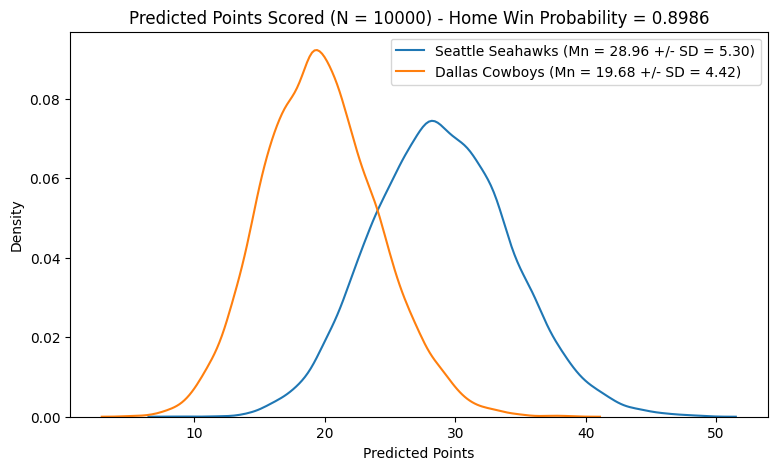

In [19]:
cls_prediction.create_plot()